In [1]:
import numpy as np
import os
#Visualizations
import matplotlib.pyplot as plt
import random
from datetime import datetime
import itertools

import swnHeatKernels as swnN 
from scipy import linalg
import helperFunc as hf
import swnMetrics as swn
import centrality as ce
import distributions as dstr

# Functions

In [2]:
def plotVarSlicesNormalVsLognormal(dictVars, dictTaus,pRand,yLabel,yLim,filePath = False):

    weightDist = ['normal','lognormal']; dictMean = {}; dictStd = {}
    
    ratio = 1
    xLabel = 'tau'
    
    colorsPlot = [ 'orange', 'green']; shapePoint = ['-s','-o']; shapePointNoLine = ['s','o']

    plt.rcParams['figure.figsize'] = [15, 6]
    fig = plt.figure()
    for count,p in enumerate(pRand):
        for ind, wD in enumerate(weightDist):
        
            if ind == 0:
                ax = fig.add_subplot(1, len(weightDist), count + 1)
                plt.xlabel(xLabel)
                
                ttl = 'pRand = '+str(p)
                plt.title(ttl)

                #plt.xticks(parameterVaried[0::2], parameterVaried[0::2])
                # plt.ylim(ylimit)
                plt.ylim(yLim)
                plt.ylabel(yLabel)

            ax.set_aspect(1.0 / ax.get_data_ratio() * ratio)
            varSlice = dictVars[wD][count, :, :]

            varStd = np.std(varSlice, axis=1)
            varSE = varStd / (np.sqrt(varSlice.shape[1]))
            varMean = np.mean(varSlice, axis=1)
            
            ax.errorbar(dictTaus[wD], varMean, varStd, mfc=colorsPlot[ind], mec=colorsPlot[ind], fmt=shapePoint[ind], color=colorsPlot[ind], label=wD)
                
            if count == 0 and ind == 1:
                ax.legend(loc='upper right')
                
    if filePath is not False:
        directory = os.path.dirname(filePath)
        if not os.path.exists(directory):  # makes the directory if it does not exist
            os.makedirs(directory)
        plt.savefig(filePath, format='eps', dpi=1200)              
           


# Code for Figure 2

In [3]:
#parameters tested
rewirings = 4000
pRand = [0,0.2]

directoryQLoad ='data/ModularityValues/'
#descr = 'QTransition_'
descr = 'QAll_'


QLoadPath = {}
QLoadPath['normal'] = directoryQLoad + descr+'normal'+'.pckl'
QLoadPath['lognormal'] = directoryQLoad + descr+'lognormal'+'.pckl'

tausAll ={}
dictQ = {}
(dictQ['normal'],tausAll['normal'])  = hf.loadVar(QLoadPath['normal'])
(dictQ['lognormal'],tausAll['lognormal']) = hf.loadVar(QLoadPath['lognormal'])

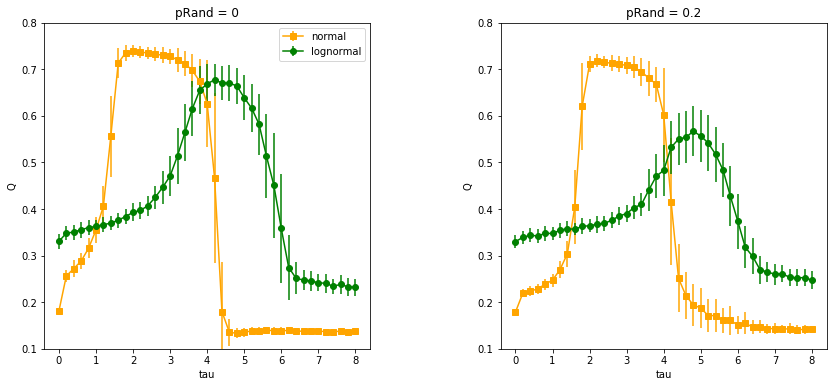

In [4]:

plotVarSlicesNormalVsLognormal(dictQ, tausAll,pRand,'Q',[0.1,0.8])